<a href="https://colab.research.google.com/github/Onturk89/NaturalLanguageProcess/blob/main/DD%C4%B0_Proje_%C3%96devi_Onur_T%C3%BCrkmen_234329043.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kullancağımız CNN modeli için tensorflow kütüphanesini import ediyoruz

In [ ]:
!pip install "tensorflow==2.8.0"

In [ ]:
import tensorflow as tf

In [ ]:
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.8.0


Kelimeleri köklerine ayırıp analiz yapabilmek için zemberek kütüphanesinin python kütüphanesinden yararlanılmıştır

In [ ]:
!pip install zemberek-python

KullanAcağım dataset için yükleme işlemi gerçekleştirilmiştir.

In [ ]:
!pip install datasets

Dil işleme çalışması için nltk kütüphanesi; edat bağlaç gibi cümle elemanlarının özne ve yüklemin özniteliklerini etkilememesi için kaldırılması için nltk kütüphanesi altında bulunan stoopwods; yüklenen datayı tablo olarak görebilmek için pandas kütüphanesi; matematiksel işlemler yapabilmek için numpy kütüphanesi; kelimeleri ayrıştırabilmek için nltk kütüphanesinde bulunan tokenize; kelimeleri görselleştirebilmek için WordCloud; n-gram gösterimleri için collections ve seaborn kütüphaneleri eklenmiştir.

In [ ]:
import nltk
from nltk.corpus import stopwords
from datasets import load_dataset
import pandas as pd
import re
import string
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import defaultdict
import seaborn as sns

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

İçinde küfürlü sözler barındıran offenseval2020_tr dataseti yüklenmiştir
Yüklemeden sonra dataset verisi çağrılarak verinin içeriği hakkında bilgi alınmıştır

In [ ]:
dataset1 = load_dataset("offenseval2020_tr")
dataset1

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/31756 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3528 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'tweet', 'subtask_a'],
        num_rows: 31756
    })
    test: Dataset({
        features: ['id', 'tweet', 'subtask_a'],
        num_rows: 3528
    })
})

In [ ]:
dataset1["train"][0]

{'id': 20948,
 'tweet': "@USER en güzel uyuyan insan ödülü jeon jungkook'a gidiyor...",
 'subtask_a': 0}

In [ ]:
dataset1["test"][0]

{'id': 41993,
 'tweet': '@USER Sayın başkanım bu şekilde devam inşallah👏',
 'subtask_a': 0}

pandas DataFrame'deki head yardımıyla datanın bir ön gösterimi yapılmaktadır. Hem train hem de test verisi kontrol edilmektedir

In [ ]:
dataset_train = pd.DataFrame(dataset1["train"])
dataset_train.head()

,id,tweet,subtask_a
0,20948,@USER en güzel uyuyan insan ödülü jeon jungkoo...,0
1,10134,"@USER Mekanı cennet olsun, saygılar sayın avuk...",0
2,23457,Kızlar aranızda kas yığını beylere düşenler ol...,0
3,18401,Biraz ders çalışayım. Tembellik ve uyku düşman...,0
4,17525,@USER Trezeguet yerine El Sharawy daha iyi olm...,0


In [ ]:
dataset_train[dataset_train["subtask_a"] == 1].head(30)

,id,tweet,subtask_a
8,13520,@USER @USER @USER Reis bu ülkenin Devlet Başka...,1
10,20724,Şu kodumun sitesine günlerce giremeyecek kadar...,1
25,26141,Nasıl o*** çocuklarıyla aynı devre denk geldik,1
31,33110,@USER Biz suriyede abd nin kara ordusu ppkpyd ...,1
35,26882,@USER @USER @USER yöneticileri olan kulüp dah...,1
36,14668,@USER MHP bu ülkenin çimentosudur...bunu bilen...,1
38,15499,@USER Okuma oranın çok düşük olduğu ve gündemi...,1
42,38440,170 boyundayim aq ya nasil kurayim boyle halay,1
61,44048,@USER @USER @USER @USER O imza parası diye el ...,1
63,12376,"Batı Esad ı gerçekten durdurmak isteseydi, B...",1


In [ ]:
dataset_train[dataset_train["subtask_a"] == 1]["tweet"][10]

'Şu kodumun sitesine günlerce giremeyecek kadar meşgul olduğumda bütün sosyal medya hesaplarımı kapatıcam amk.'

In [ ]:
dataset_train[dataset_train["subtask_a"] == 0] ["tweet"][24]

'@USER Aşkta öyle bişey olsa gerek'

In [ ]:
dataset_test = pd.DataFrame(dataset1["test"])
dataset_test.head()

,id,tweet,subtask_a
0,41993,@USER Sayın başkanım bu şekilde devam inşallah👏,0
1,23000,"Herkes gevşekliği kadar duyar kasıyor,hayat bö...",0
2,42478,Olgun ilişkisi olan arkadaş size en güzel hedi...,0
3,21748,@USER @USER Burada atıp tutacağına o kötü koşu...,1
4,13607,@USER İşte o onur dediğin sende yok sorun o işte,1


Data üzerinde spesifik olarak küfürlü cümle olup olmadığına bakılacağı için train ve test datasetleri özü bozulmadan birleştirilmiştir

In [ ]:
dataset_tweet = pd.concat([dataset_train ,dataset_test], axis=0,ignore_index=True, sort=False)

In [ ]:
dataset_tweet['tweet'][0]

"@USER en güzel uyuyan insan ödülü jeon jungkook'a gidiyor..."

In [ ]:
dataset_tweet.head()

,id,tweet,subtask_a
0,20948,@USER en güzel uyuyan insan ödülü jeon jungkoo...,0
1,10134,"@USER Mekanı cennet olsun, saygılar sayın avuk...",0
2,23457,Kızlar aranızda kas yığını beylere düşenler ol...,0
3,18401,Biraz ders çalışayım. Tembellik ve uyku düşman...,0
4,17525,@USER Trezeguet yerine El Sharawy daha iyi olm...,0


In [ ]:
dataset_tweet.subtask_a.value_counts()

subtask_a
0    28437
1     6847
Name: count, dtype: int64

id bilgisine ihtiyaç duyulmayacağı için id kolonu düşürülmüştür

In [ ]:
dataset_tweet = dataset_tweet.drop(['id'], axis = 1)
dataset_tweet.head()

,tweet,subtask_a
0,@USER en güzel uyuyan insan ödülü jeon jungkoo...,0
1,"@USER Mekanı cennet olsun, saygılar sayın avuk...",0
2,Kızlar aranızda kas yığını beylere düşenler ol...,0
3,Biraz ders çalışayım. Tembellik ve uyku düşman...,0
4,@USER Trezeguet yerine El Sharawy daha iyi olm...,0


Kolon isimleri yapılacak çalışma için değiştirilmiştir

In [ ]:
dataset_tweet.columns = ["tweet","target"]
dataset_tweet.head()

,tweet,target
0,@USER en güzel uyuyan insan ödülü jeon jungkoo...,0
1,"@USER Mekanı cennet olsun, saygılar sayın avuk...",0
2,Kızlar aranızda kas yığını beylere düşenler ol...,0
3,Biraz ders çalışayım. Tembellik ve uyku düşman...,0
4,@USER Trezeguet yerine El Sharawy daha iyi olm...,0


@ ifadesi içeren cümlelerin analizi yapılmıştır

In [ ]:
dataset_tweet[dataset_tweet['tweet'].str.contains('@')]

,tweet,target
0,@USER en güzel uyuyan insan ödülü jeon jungkoo...,0
1,"@USER Mekanı cennet olsun, saygılar sayın avuk...",0
4,@USER Trezeguet yerine El Sharawy daha iyi olm...,0
5,@USER Bence de olması gerekiyor. Hatta meslek ...,0
8,@USER @USER @USER Reis bu ülkenin Devlet Başka...,1
...,...,...
35277,@USER Dilerim rabbim seni kahru perişan etsin ...,1
35278,@USER Allahtan hakaret yok yokken böyle yapılı...,0
35279,@USER Çok iyi oyuncu. Serdar’dan çok çok iyi,0
35280,@USER bu gün mənim Bəbəşimin ad günüdü💜💜💜💜. Tə...,0


@ işaretine bağlı kelimeler kaldırılmıştır

In [ ]:
dataset_tweet['tweet'] = dataset_tweet['tweet'].replace('@[A-Za-z0-9]+', '', regex=True).replace('@[A-Za-z0-9]+', '', regex=True)

kaldırılma işleminin başarılı bir şekilde yapıldığı görülmektedir

In [ ]:
dataset_tweet[dataset_tweet['tweet'].str.contains('@')]

,tweet,target
9067,#idev2018 #idev #atlasemlakrealestateoffice @ ...,0
9372,#SnRTEMahkumMüjdeBekliyor adli mahkuma eşit...,0
13796,Sn basbakanim bugunun ve gelecgin tarimi zir...,0
13901,Sn basbakanim bugunun ve gelecgin tarimi zira...,0
14652,keşke sonsuzun o sunu @ ile yazmasaymış ...,0
22922,Sayın Bakanım Alan Değişikliği bekliyoruz....,0
23277,Tabiki de beni dinliceksin:@@@ yaz mk nolcak ...,1
26133,"""borsada bi laf var"" diye girmiştim ben. bknz...",0
28543,#çöktü FIFA WOMEN’S WORLD CUP 2019 Hollanda @ ...,0
30063,SAYINCUMHURREIS I @@@@@ TUREMIS DIYONDA V...,0


Veri büyük olduğu zaman kelimeyi köklerine ayırma işlemi uzun sürdüğü için veriseti küçülmüştür. Her çalıştırıldığında rastgele seçilen bir dataseti kümesi ile çalıştırılmaktadır.

In [ ]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(dataset_tweet["tweet"],
                                                                            dataset_tweet["target"],
                                                                            test_size=0.2)

In [ ]:
data_train = {
  "tweet": train_sentences,
  "target": train_labels
}

In [ ]:
train_tweet = pd.DataFrame(data_train)
train_tweet.head()

,tweet,target
24682,Çilek gibi hissediyorum bu kadar çok seviyoru...,0
9370,Bunu soylende bir terörist yanlisi ! utanmak...,1
28712,sen iyi misin yahshshshjs gayet medenice ta...,1
9527,Yalnızlıgı cekilmez kılan bircok sebep vardır...,0
5133,Dedem niye Koreli değil¿? Jimin neden normal...,0


In [ ]:
train_tweet['tweet'][0]

" en güzel uyuyan insan ödülü jeon jungkook'a gidiyor..."

Türkçede geçen stopword'ler aşağıdaki gibidir

In [ ]:
stopword= set(stopwords.words('turkish'))
stopword

{'acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'en',
 'eğer',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'ile',
 'ise',
 'için',
 'kez',
 'ki',
 'kim',
 'mu',
 'mü',
 'mı',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niye',
 'niçin',
 'o',
 'sanki',
 'siz',
 'tüm',
 've',
 'veya',
 'ya',
 'yani',
 'çok',
 'çünkü',
 'şey',
 'şu'}

Veri setimizde olan stopword'lere bakılmıştır

In [ ]:
for text in stopword:
  print(f"{text} : {dataset_tweet.loc[dataset_tweet['tweet'].str.contains(text)].target.value_counts().sum()}")

şu : 1576
mı : 7012
nereye : 87
daha : 1665
gibi : 2210
belki : 244
diye : 2691
mu : 4884
hepsi : 274
neden : 671
bazı : 189
birşey : 187
çok : 3031
biz : 1720
için : 3122
ne : 12164
aslında : 152
her : 2435
da : 16821
nerde : 171
çünkü : 380
kez : 282
ki : 9816
eğer : 491
nerede : 140
o : 29260
nasıl : 1009
birkaç : 41
hem : 433
defa : 167
ile : 5466
ise : 597
kim : 1563
acaba : 288
niye : 669
ya : 17111
mü : 2065
yani : 400
de : 19727
hep : 924
şey : 2905
ve : 7996
ama : 7590
tüm : 529
siz : 2851
az : 7315
niçin : 11
sanki : 181
veya : 210
bu : 8291
en : 21249
hiç : 1203
biri : 1246


Stopword'ler ile birlikte noktalama ve özel işaretleri kaldırmak için aşağıdaki fonksiyon yazılmıştır.

In [ ]:
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub('https?://\S+|www\.S+','', text)
  text = re.sub('<.*?>+','',text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)

  text = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", text)
  text = re.sub("[^a-zA-ZğüşöçıİĞÜŞÖÇ ]+", "", text)
  text = [word for word in text.split(' ') if word not in stopword]
  text=" ".join(text)

  return text

Fonksiyon datasetimizin tweet kolonuna uygulanmıştır

In [ ]:
train_tweet["tweet"] = train_tweet["tweet"].apply(clean)
train_tweet.head()

,tweet,target
24682,çilek hissediyorum kadar seviyorum kendi kend...,0
9370,bunu soylende bir terörist yanlisi utanmakd...,1
28712,sen iyi misin yahshshshjs gayet medenice ta...,1
9527,yalnızlıgı cekilmez kılan bircok sebep vardır...,0
5133,dedem koreli değil jimin normal değil bunl...,0


Uygulama sonucunda stopword'lerde ne kadar bir azalma olduğu kontrool edilmiştir

In [ ]:
for text in stopword:
  print(f"{text} : {train_tweet.loc[train_tweet['tweet'].str.contains(text)].target.value_counts().sum()}")

şu : 932
mı : 5040
nereye : 2
daha : 76
gibi : 176
belki : 26
diye : 839
mu : 3961
hepsi : 104
neden : 155
bazı : 62
birşey : 57
çok : 172
biz : 1282
için : 518
ne : 8330
aslında : 7
her : 1301
da : 11922
nerde : 97
çünkü : 27
kez : 86
ki : 6910
eğer : 310
nerede : 67
o : 23191
nasıl : 51
birkaç : 2
hem : 250
defa : 44
ile : 3867
ise : 298
kim : 1218
acaba : 12
niye : 247
ya : 13494
mü : 1823
yani : 86
de : 14938
hep : 283
şey : 1406
ve : 4088
ama : 4756
tüm : 141
siz : 2301
az : 5668
niçin : 9
sanki : 8
veya : 7
bu : 4551
en : 16745
hiç : 328
biri : 772


Etiketleme yapabilmek için küfürlü sözcükler indirilmiş ve pandas DataFrame yardımıyla okutulmuştur.
https://github.com/d35k/Turkish-Swear-Words/blob/master/swears.txt

https://drive.google.com/file/d/13Ta9SfB8HzmDKxFlLmNXfv8IqU13EiWq/view?usp=sharing

In [ ]:
swears_df =  pd.read_csv("/content/drive/MyDrive/DDI_ODEVI/swears.txt",)
swears_df.head()

,KufurluSoz
0,abaza
1,abazan
2,ag
3,ağzına sıçayım
4,ahmak


Okunan küfür veri seti karşılaştırma yapabilmek için liste haline getirilmiştir

In [ ]:
swears = set(swears_df.KufurluSoz.values)

Küfürlü kelime kontrolü yapılmadan önce veri setinin uzunluğunu azaltmak için nadir olan kelimelerden küfürlü olmayanlarını kaldırmak için aşağıdaki fonksiyon yazılmıştır

In [ ]:
def remove_rare_words(df, column_name ,exceptionlist, n_rare_words=1000):
    """
    Pandas Framework'te bulunan nadir kelimeleri kaldırır

    Bu fonksiyon, metin verilerinde en az görülen sözcükleri tanımlar ve kaldırır.

    Parametreler:
    df (pandas.DataFrame): Metin datalarını içeren DataFrame
    column_name (str): Temizlenecek sütunun adı
    n_rare_words (int): Temizlenecek nadir kelime sayısı

    Returns:
    pandas.DataFrame: A DataFrame with rare words removed from the specified column.
    """
    # Identifying the rare words
    freq = pd.Series(' '.join(df[column_name]).split()).value_counts()
    rare_words = freq[-n_rare_words:]

    # Removing the rare words
    df[column_name] = df[column_name].apply(lambda x: " ".join(word for word in x.split() if (word not in rare_words or word in exceptionlist  )))
    return df

Kelime kümesinde nadir olan kelimelerden 1000 tanesi kaldırılmıştır

In [ ]:
train_tweet = remove_rare_words(train_tweet, 'tweet' , swears, 1000)
train_tweet.head()

,tweet,target
24682,çilek hissediyorum kadar seviyorum kendi kendi...,0
9370,bunu bir terörist yok sizlerde kalmamis,1
28712,sen iyi misin yahshshshjs gayet medenice ben l...,1
9527,yalnızlıgı cekilmez kılan bircok sebep vardır ...,0
5133,dedem koreli değil jimin normal değil bunlar i...,0


Tokenize işleminin kontrolü gerçekleşmiştir

In [ ]:
word_tokenize("sitede ifşa ispiyonculuktan boktan bir", language='turkish', preserve_line=False)

['sitede', 'ifşa', 'ispiyonculuktan', 'boktan', 'bir']

tokenizedtweet altında kelimelerin yapısı bulunmadan biribirinden ayrılmıştır

In [ ]:
train_tweet['tokenizedtweet'] =  train_tweet['tweet'].apply(lambda x: word_tokenize(x, language='turkish', preserve_line=False))
train_tweet.head()

,tweet,target,tokenizedtweet
24682,çilek hissediyorum kadar seviyorum kendi kendi...,0,"[çilek, hissediyorum, kadar, seviyorum, kendi,..."
9370,bunu bir terörist yok sizlerde kalmamis,1,"[bunu, bir, terörist, yok, sizlerde, kalmamis]"
28712,sen iyi misin yahshshshjs gayet medenice ben l...,1,"[sen, iyi, misin, yahshshshjs, gayet, medenice..."
9527,yalnızlıgı cekilmez kılan bircok sebep vardır ...,0,"[yalnızlıgı, cekilmez, kılan, bircok, sebep, v..."
5133,dedem koreli değil jimin normal değil bunlar i...,0,"[dedem, koreli, değil, jimin, normal, değil, b..."


Zemberek kütüphanesinde kelime analizi için kullanacağımız fonksiyonlar indirilmiştir

In [ ]:
from zemberek import (
    TurkishSpellChecker,
    TurkishSentenceNormalizer,
    TurkishSentenceExtractor,
    TurkishMorphology,
    TurkishTokenizer
)

In [ ]:
morphology = TurkishMorphology.create_with_defaults()

INFO:zemberek.morphology.turkish_morphology:TurkishMorphology instance initialized in 7.3797852993011475


2024-05-12 13:15:27,545 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 7.3797852993011475



Aşağıdaki döngü ile kelimelerin cümledeki özellikleri (özne, yüklem gibi) ile sınıflandırılması işlemi POS Tag yardımıyla yapılmıştır

In [ ]:
lemSen = []
for index , row in train_tweet.iterrows():
  words = row["tokenizedtweet"]
  newSentence = []
  for word in words:
    if word == '':
      continue
    else:
      results = morphology.analyze(word)
      if len(results.analysis_results) == 0:
        continue

      newSentence.append(results.analysis_results[0].format_string().split(" ")[0])
  lemSen.append( newSentence)

Oluşturulan postagli liste veri setine eklenmiştir

In [ ]:
train_tweet["postaggedtweetwithlemmatize"] = lemSen
train_tweet.head()

,tweet,target,tokenizedtweet,postaggedtweetwithlemmatize
24682,çilek hissediyorum kadar seviyorum kendi kendi...,0,"[çilek, hissediyorum, kadar, seviyorum, kendi,...","[[çilek:Noun], [hissetmek:Verb], [kadar:Postp,..."
9370,bunu bir terörist yok sizlerde kalmamis,1,"[bunu, bir, terörist, yok, sizlerde, kalmamis]","[[bu:Pron,, [bir:Det], [terörist:Noun], [yok:C..."
28712,sen iyi misin yahshshshjs gayet medenice ben l...,1,"[sen, iyi, misin, yahshshshjs, gayet, medenice...","[[se:Noun], [iyi:Adj], [mi:Ques], [gayet:Adv],..."
9527,yalnızlıgı cekilmez kılan bircok sebep vardır ...,0,"[yalnızlıgı, cekilmez, kılan, bircok, sebep, v...","[[kılmak:Verb], [sebep:Noun], [varmak:Verb], [..."
5133,dedem koreli değil jimin normal değil bunlar i...,0,"[dedem, koreli, değil, jimin, normal, değil, b...","[[dede:Noun], [Korel:Noun,, [değil:Conj], [Jim..."


Lemmatize işlemi 8-10 dakika gibi bir sürede tamamlanmaktadır. Denemeler sırasında zaman kaybetmemek adına örnek bir csv dosyası kayıt edilmiştir.

In [ ]:
import os
os.makedirs('/content/drive/MyDrive/Diğer', exist_ok=True)
train_tweet.to_csv('/content/NLP_Turkish_Tweets_Lemmatize_Text.csv')

https://drive.google.com/file/d/1--6EGTzIbLEoeJ0WzKPgauOTmPXe_TfD/view?usp=sharing

In [ ]:
train_tweet = pd.read_csv("/content/drive/MyDrive/DDI_ODEVI/NLP_Turkish_Tweets_Lemmatize_Text.csv")

İşlem ugulandıktan sonra pos tagli ifadeleri görebiliyoruz. Örneğin 3. sütunda kök haline getirilen kelimelerin cümledeki nitelikleri olan isim, yüklem etiketlemeye dahil olmuştur

In [ ]:
train_tweet.head()

,tweet,target,tokenizedtweet,postaggedtweetwithlemmatize
24682,çilek hissediyorum kadar seviyorum kendi kendi...,0,"[çilek, hissediyorum, kadar, seviyorum, kendi,...","[[çilek:Noun], [hissetmek:Verb], [kadar:Postp,..."
9370,bunu bir terörist yok sizlerde kalmamis,1,"[bunu, bir, terörist, yok, sizlerde, kalmamis]","[[bu:Pron,, [bir:Det], [terörist:Noun], [yok:C..."
28712,sen iyi misin yahshshshjs gayet medenice ben l...,1,"[sen, iyi, misin, yahshshshjs, gayet, medenice...","[[se:Noun], [iyi:Adj], [mi:Ques], [gayet:Adv],..."
9527,yalnızlıgı cekilmez kılan bircok sebep vardır ...,0,"[yalnızlıgı, cekilmez, kılan, bircok, sebep, v...","[[kılmak:Verb], [sebep:Noun], [varmak:Verb], [..."
5133,dedem koreli değil jimin normal değil bunlar i...,0,"[dedem, koreli, değil, jimin, normal, değil, b...","[[dede:Noun], [Korel:Noun,, [değil:Conj], [Jim..."


(NASİBOGLU & Gencer, 2023) yaptıkları çalışmada olduğu gibi Modeli Pos Tagli veri üzerinden deneyeceğiz o yüzden orijinal tweet metni çıkartılmıştır

In [ ]:
train_tweet.drop(train_tweet.columns[0], axis = 1, inplace =True)
train_tweet.head()

,target,tokenizedtweet,postaggedtweetwithlemmatize
24682,0,"[çilek, hissediyorum, kadar, seviyorum, kendi,...","[[çilek:Noun], [hissetmek:Verb], [kadar:Postp,..."
9370,1,"[bunu, bir, terörist, yok, sizlerde, kalmamis]","[[bu:Pron,, [bir:Det], [terörist:Noun], [yok:C..."
28712,1,"[sen, iyi, misin, yahshshshjs, gayet, medenice...","[[se:Noun], [iyi:Adj], [mi:Ques], [gayet:Adv],..."
9527,0,"[yalnızlıgı, cekilmez, kılan, bircok, sebep, v...","[[kılmak:Verb], [sebep:Noun], [varmak:Verb], [..."
5133,0,"[dedem, koreli, değil, jimin, normal, değil, b...","[[dede:Noun], [Korel:Noun,, [değil:Conj], [Jim..."


PosTagli kolonda yer alan köşeli parentez işaretleri veri işlem için kaldırılmıştır

In [ ]:
def clean_brackets(text):
    """
    Köseli parentezleri kaldırır

    """
    text = str(text).lower()
    text = text.replace("[","").replace("]","").replace(",","")
    text = ['' if text == '' else text ]
    text = " ".join(text)

    return text

İşlem sonucu parantezlerin kaldırıldığı gözükmektedir

In [ ]:
train_tweet["ptlTweet"] = train_tweet["postaggedtweetwithlemmatize"].apply(clean_brackets)
train_tweet.head()

,target,tokenizedtweet,postaggedtweetwithlemmatize,ptlTweet
24682,0,"[çilek, hissediyorum, kadar, seviyorum, kendi,...","[[çilek:Noun], [hissetmek:Verb], [kadar:Postp,...",'çilek:noun' 'hissetmek:verb' 'kadar:postp' 's...
9370,1,"[bunu, bir, terörist, yok, sizlerde, kalmamis]","[[bu:Pron,, [bir:Det], [terörist:Noun], [yok:C...",'bu:pron' 'bir:det' 'terörist:noun' 'yok:conj'...
28712,1,"[sen, iyi, misin, yahshshshjs, gayet, medenice...","[[se:Noun], [iyi:Adj], [mi:Ques], [gayet:Adv],...",'se:noun' 'iyi:adj' 'mi:ques' 'gayet:adv' 'med...
9527,0,"[yalnızlıgı, cekilmez, kılan, bircok, sebep, v...","[[kılmak:Verb], [sebep:Noun], [varmak:Verb], [...",'kılmak:verb' 'sebep:noun' 'varmak:verb' 'unut...
5133,0,"[dedem, koreli, değil, jimin, normal, değil, b...","[[dede:Noun], [Korel:Noun,, [değil:Conj], [Jim...",'dede:noun' 'korel:noun' 'değil:conj' 'jim:nou...


Kelime ve kelimenin cümledeki özniteliği birbirinden ayrılarak kelimenin asıl yapısı ortaya çıkartılmıştır

In [ ]:
train_tweet["ptlTweet"] = train_tweet["ptlTweet"].apply(lambda x: " ".join(word for word in x.split(":")))
train_tweet.head()

,target,tokenizedtweet,postaggedtweetwithlemmatize,ptlTweet
24682,0,"[çilek, hissediyorum, kadar, seviyorum, kendi,...","[[çilek:Noun], [hissetmek:Verb], [kadar:Postp,...",'çilek noun' 'hissetmek verb' 'kadar postp' 's...
9370,1,"[bunu, bir, terörist, yok, sizlerde, kalmamis]","[[bu:Pron,, [bir:Det], [terörist:Noun], [yok:C...",'bu pron' 'bir det' 'terörist noun' 'yok conj'...
28712,1,"[sen, iyi, misin, yahshshshjs, gayet, medenice...","[[se:Noun], [iyi:Adj], [mi:Ques], [gayet:Adv],...",'se noun' 'iyi adj' 'mi ques' 'gayet adv' 'med...
9527,0,"[yalnızlıgı, cekilmez, kılan, bircok, sebep, v...","[[kılmak:Verb], [sebep:Noun], [varmak:Verb], [...",'kılmak verb' 'sebep noun' 'varmak verb' 'unut...
5133,0,"[dedem, koreli, değil, jimin, normal, değil, b...","[[dede:Noun], [Korel:Noun,, [değil:Conj], [Jim...",'dede noun' 'korel noun' 'değil conj' 'jim nou...


Kelime ayrımı yapıldıktan sonra postagli ilk kolon kaldırılmıştır

In [ ]:
train_tweet = train_tweet.drop(["postaggedtweetwithlemmatize"], axis = 1)
train_tweet.head()

,target,tokenizedtweet,ptlTweet
24682,0,"[çilek, hissediyorum, kadar, seviyorum, kendi,...",'çilek noun' 'hissetmek verb' 'kadar postp' 's...
9370,1,"[bunu, bir, terörist, yok, sizlerde, kalmamis]",'bu pron' 'bir det' 'terörist noun' 'yok conj'...
28712,1,"[sen, iyi, misin, yahshshshjs, gayet, medenice...",'se noun' 'iyi adj' 'mi ques' 'gayet adv' 'med...
9527,0,"[yalnızlıgı, cekilmez, kılan, bircok, sebep, v...",'kılmak verb' 'sebep noun' 'varmak verb' 'unut...
5133,0,"[dedem, koreli, değil, jimin, normal, değil, b...",'dede noun' 'korel noun' 'değil conj' 'jim nou...


Hangi tweet'de küfür olduğunun tespit için yeni bir kolon eklenecektir

In [ ]:
swearExists = np.zeros(len(train_tweet))

In [ ]:
train_tweet["SwearExists"] = pd.DataFrame(swearExists, index= train_tweet.index)
train_tweet.head()

,target,tokenizedtweet,ptlTweet,SwearExists
24682,0,"[çilek, hissediyorum, kadar, seviyorum, kendi,...",'çilek noun' 'hissetmek verb' 'kadar postp' 's...,0.0
9370,1,"[bunu, bir, terörist, yok, sizlerde, kalmamis]",'bu pron' 'bir det' 'terörist noun' 'yok conj'...,0.0
28712,1,"[sen, iyi, misin, yahshshshjs, gayet, medenice...",'se noun' 'iyi adj' 'mi ques' 'gayet adv' 'med...,0.0
9527,0,"[yalnızlıgı, cekilmez, kılan, bircok, sebep, v...",'kılmak verb' 'sebep noun' 'varmak verb' 'unut...,0.0
5133,0,"[dedem, koreli, değil, jimin, normal, değil, b...",'dede noun' 'korel noun' 'değil conj' 'jim nou...,0.0


Küfürlü olup olmadığının karşılaştırılması 0 ve 1 üzerinden yapılacağı için double veri tipindeki SwearExists kolonu int64'e çevrilmiştir

In [ ]:
train_tweet["SwearExists"] = train_tweet["SwearExists"].astype('int64')
train_tweet.head()

,target,tokenizedtweet,ptlTweet,SwearExists
24682,0,"[çilek, hissediyorum, kadar, seviyorum, kendi,...",'çilek noun' 'hissetmek verb' 'kadar postp' 's...,0
9370,1,"[bunu, bir, terörist, yok, sizlerde, kalmamis]",'bu pron' 'bir det' 'terörist noun' 'yok conj'...,0
28712,1,"[sen, iyi, misin, yahshshshjs, gayet, medenice...",'se noun' 'iyi adj' 'mi ques' 'gayet adv' 'med...,0
9527,0,"[yalnızlıgı, cekilmez, kılan, bircok, sebep, v...",'kılmak verb' 'sebep noun' 'varmak verb' 'unut...,0
5133,0,"[dedem, koreli, değil, jimin, normal, değil, b...",'dede noun' 'korel noun' 'değil conj' 'jim nou...,0


indekslemeyle ilgili uyarı mesajları akışta çok yer kapladığı için burdaki uyarı mesajları kapatılmıştır

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

Küfürlü mesajın bulunduğu tweet bulunarak aynı satırdaki SwearExists kolonu 1 olarak işaretlenmiştir

In [ ]:
for index , row in train_tweet.iterrows():
  features = row["ptlTweet"].replace("'","").split(" ")
  for word in features:
    if word in swears:
      train_tweet.SwearExists[index] = 1

Küfürlü eşleşmelerin bazıları aşağıda gösterilmiştir

In [ ]:
train_tweet[train_tweet["SwearExists"] == 1].head()

,target,tokenizedtweet,ptlTweet,SwearExists
9370,1,"[bunu, bir, terörist, yok, sizlerde, kalmamis]",'bu pron' 'bir det' 'terörist noun' 'yok conj'...,1
5133,0,"[dedem, koreli, değil, jimin, normal, değil, b...",'dede noun' 'korel noun' 'değil conj' 'jim nou...,1
12156,0,"[misafir, habersiz, gelir, rızık, kader, ölüm,...",'misafir noun' 'haber noun' 'gelmek verb' 'rız...,1
5788,0,"[biraz, zam, yapmaları, durumunda, şeytanlar, ...",'biraz adj' 'zam noun' 'yapmak verb' 'durum no...,1
27054,1,"[neler, oluyor, neler, istiklal, marşının, oku...",'ne noun' 'olmak verb' 'ne noun' 'istiklâl nou...,1


Küfürlü kelime vurgulanmak için  Patel, R., & Passi, K. (2020). Sentiment analysis on twitter data of world cup soccer tournament using machine learning. IoT, 1(2), 14. kullanıldığı gibi "_NEG ifadesi eklenmiştir"

In [ ]:
taggedSen = []
for index , row in train_tweet.iterrows():
  newSentence = []
  features = row["tokenizedtweet"]
  for word in features:
    if word == '':
      continue
    if word in swears:
      newSentence.append(word + "_NEG")
    else:
      newSentence.append(word)
  taggedSen.append(newSentence)

In [ ]:
len(train_tweet)

28227

In [ ]:
taggedSen[:10]

[['çilek',
  'hissediyorum',
  'kadar',
  'seviyorum',
  'kendi',
  'kendime',
  'konuşuyorum'],
 ['bunu', 'bir', 'terörist_NEG', 'yok', 'sizlerde', 'kalmamis'],
 ['sen',
  'iyi',
  'misin',
  'yahshshshjs',
  'gayet',
  'medenice',
  'ben',
  'laf',
  'sokmaya',
  'falan',
  'emin',
  'ol'],
 ['yalnızlıgı',
  'cekilmez',
  'kılan',
  'bircok',
  'sebep',
  'vardır',
  'unutma',
  'yalnızlıkbize',
  'gercek',
  'dostlarımızın',
  'oldugunu',
  'hatırlatır'],
 ['dedem',
  'koreli',
  'değil',
  'jimin',
  'normal',
  'değil',
  'bunlar',
  'işler',
  'farklı',
  'olabilirdi'],
 ['beni', 'üzdü', 'cidden'],
 ['misafir',
  'habersiz',
  'gelir',
  'rızık',
  'kader',
  'ölüm',
  'allahım',
  'helal',
  'güzel',
  'imanlı',
  'eyle'],
 ['gündüzleri', 'pozitif', 'geceleri', 'negatif', 'düşünüyorum', 'böyle'],
 ['selo', 'başkan', 'seni', 'asla', 'başkan', 'yapmayacağız'],
 ['şeyi',
  'fazla',
  'düşünmekle',
  'zerre',
  'kadar',
  'umrumda',
  'olmaması',
  'arasında',
  'gidip',
  'geliyoru

Etiketlenmiş tweet ayrı bir kolon olarak eklenmiştir

In [ ]:
train_tweet["taggedTweet"] =  taggedSen
train_tweet.head()

,target,tokenizedtweet,ptlTweet,SwearExists,taggedTweet
24682,0,"[çilek, hissediyorum, kadar, seviyorum, kendi,...",'çilek noun' 'hissetmek verb' 'kadar postp' 's...,0,"[çilek, hissediyorum, kadar, seviyorum, kendi,..."
9370,1,"[bunu, bir, terörist, yok, sizlerde, kalmamis]",'bu pron' 'bir det' 'terörist noun' 'yok conj'...,1,"[bunu, bir, terörist_NEG, yok, sizlerde, kalma..."
28712,1,"[sen, iyi, misin, yahshshshjs, gayet, medenice...",'se noun' 'iyi adj' 'mi ques' 'gayet adv' 'med...,0,"[sen, iyi, misin, yahshshshjs, gayet, medenice..."
9527,0,"[yalnızlıgı, cekilmez, kılan, bircok, sebep, v...",'kılmak verb' 'sebep noun' 'varmak verb' 'unut...,0,"[yalnızlıgı, cekilmez, kılan, bircok, sebep, v..."
5133,0,"[dedem, koreli, değil, jimin, normal, değil, b...",'dede noun' 'korel noun' 'değil conj' 'jim nou...,1,"[dedem, koreli, değil, jimin, normal, değil, b..."


Word cloud'da küfürün yer aldığı tweetlerde en çok geçen kelimeler gösterilmiştir

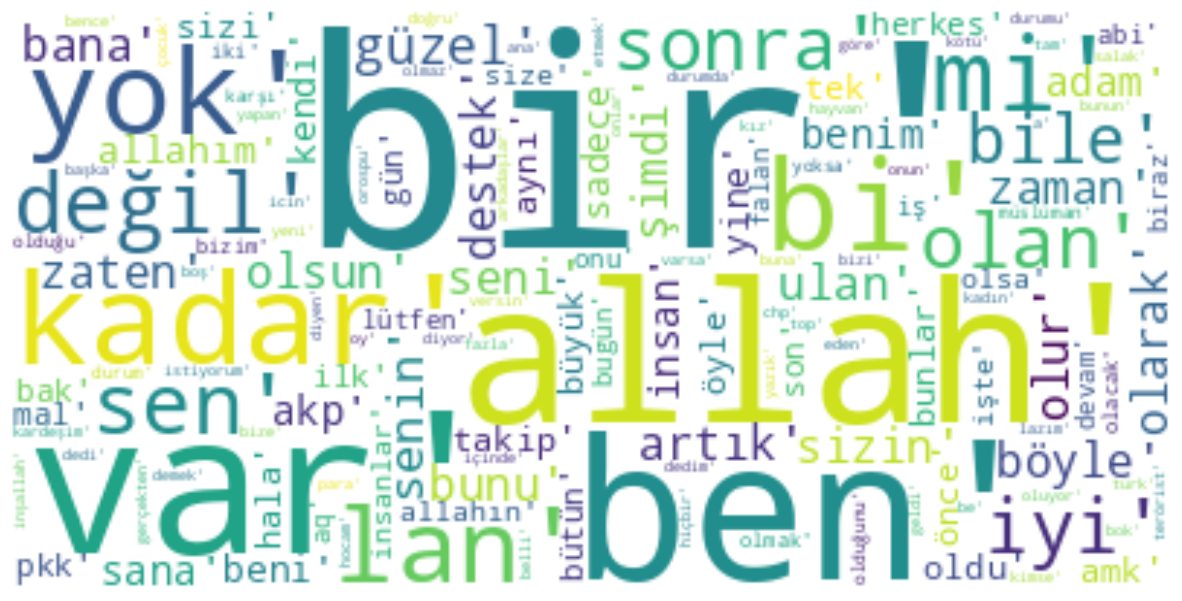

In [ ]:
text = " ".join(i for i in train_tweet[train_tweet["SwearExists"] == 1].taggedTweet.apply(lambda x: " ".join(word for word in x)))
wordcloud = WordCloud(stopwords=stopword, background_color="white").generate(text.replace("_NEG",""))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

2'li n-gram üzerinden küfürlü ve küfürsüz tweetlerdeki kelimelerin sıklığı aşağıda gösterilmiştir. Grafikte küfürlü sözcüğün birebir yakalanması yapılan çalışmayla ilgili olumlu işaret vermektedir

In [ ]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stopword]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [ ]:
# Bigrams
swear_bigrams = defaultdict(int)
nonswear_bigrams = defaultdict(int)

In [ ]:
swear_tweets = train_tweet["SwearExists"] == 1

In [ ]:
for tweet in train_tweet[swear_tweets]['tweet']:
    for word in generate_ngrams(tweet, n_gram = 2):
        swear_bigrams[word] += 1

In [ ]:
nonswear_tweets = train_tweet["SwearExists"] == 0

In [ ]:
for tweet in train_tweet[nonswear_tweets]['tweet']:
    for word in generate_ngrams(tweet, n_gram = 2):
        nonswear_bigrams[word] += 1

In [ ]:
swear_bigrams_df = pd.DataFrame(sorted(swear_bigrams.items(), key=lambda x: x[1])[::-1])
nonswear_bigrams_df = pd.DataFrame(sorted(nonswear_bigrams.items(), key=lambda x: x[1])[::-1])

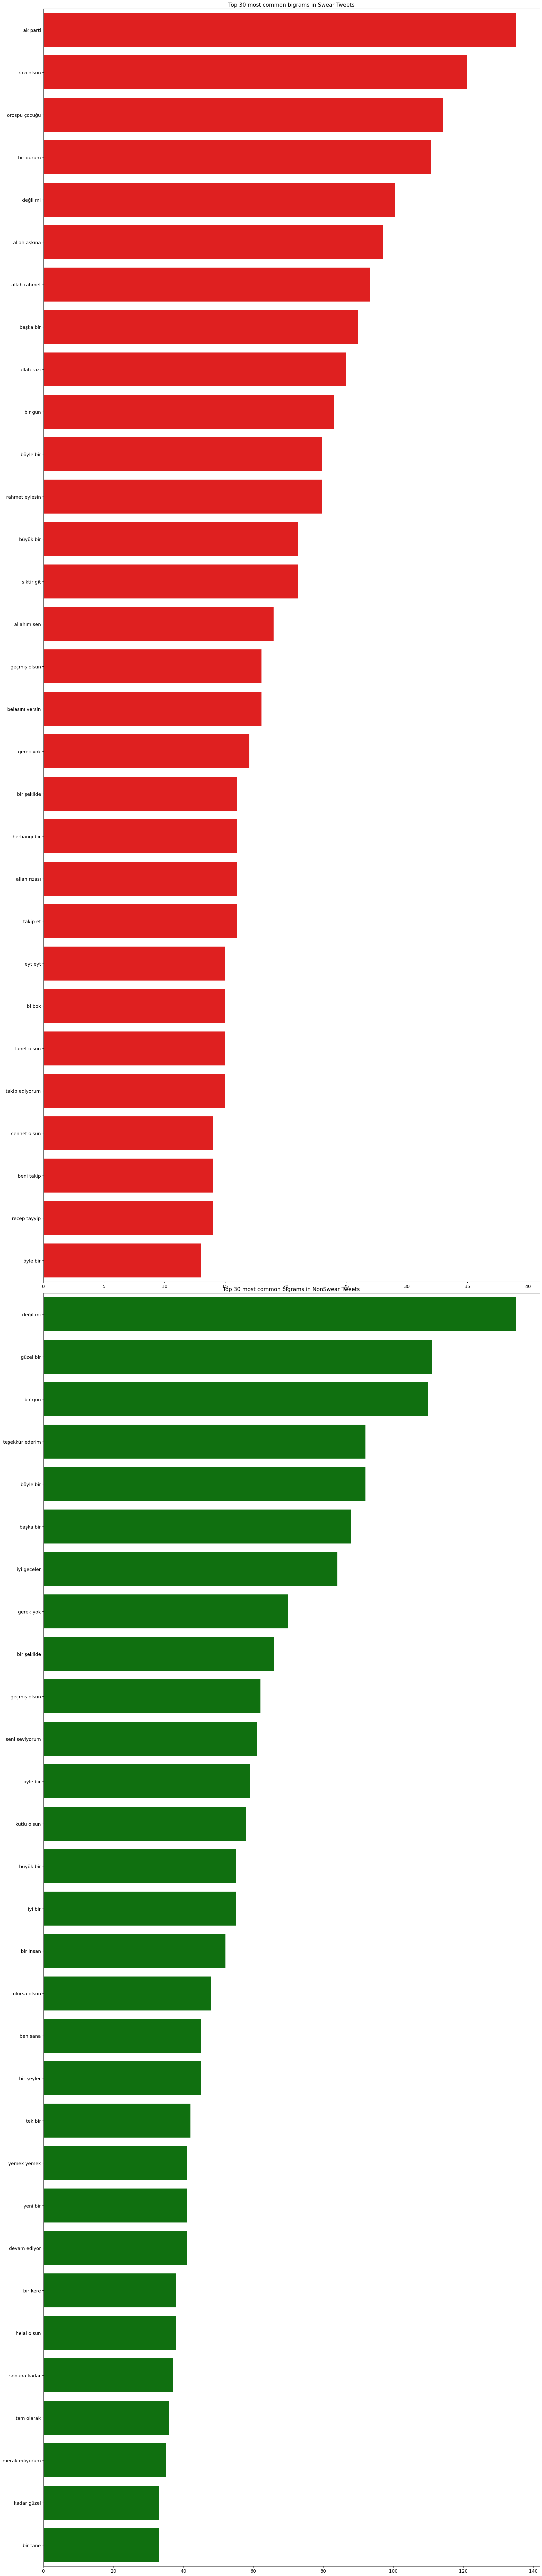

In [ ]:
N = 30

fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(20, 100), dpi=100)
plt.tight_layout()

sns.barplot(y=swear_bigrams_df[0].values[:N], x=swear_bigrams_df[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=nonswear_bigrams_df[0].values[:N], x=nonswear_bigrams_df[1].values[:N], ax=axes[1], color='green')


for i in range(2):
  axes[i].spines['right'].set_visible(False)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')
  axes[i].tick_params(axis='x', labelsize=13)
  axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Swear Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in NonSwear Tweets', fontsize=15)


plt.show()

In [ ]:
train_tweet.head()

,target,tokenizedtweet,ptlTweet,SwearExists,taggedTweet
24682,0,"[çilek, hissediyorum, kadar, seviyorum, kendi,...",'çilek noun' 'hissetmek verb' 'kadar postp' 's...,0,"[çilek, hissediyorum, kadar, seviyorum, kendi,..."
9370,1,"[bunu, bir, terörist, yok, sizlerde, kalmamis]",'bu pron' 'bir det' 'terörist noun' 'yok conj'...,1,"[bunu, bir, terörist_NEG, yok, sizlerde, kalma..."
28712,1,"[sen, iyi, misin, yahshshshjs, gayet, medenice...",'se noun' 'iyi adj' 'mi ques' 'gayet adv' 'med...,0,"[sen, iyi, misin, yahshshshjs, gayet, medenice..."
9527,0,"[yalnızlıgı, cekilmez, kılan, bircok, sebep, v...",'kılmak verb' 'sebep noun' 'varmak verb' 'unut...,0,"[yalnızlıgı, cekilmez, kılan, bircok, sebep, v..."
5133,0,"[dedem, koreli, değil, jimin, normal, değil, b...",'dede noun' 'korel noun' 'değil conj' 'jim nou...,1,"[dedem, koreli, değil, jimin, normal, değil, b..."


Yapay zeka modeli tasarlamak için modelde kullanılacak kolonlar ayrılmıştır

In [ ]:
df_tweet = train_tweet[["ptlTweet","target", "SwearExists" ]].copy()
df_tweet.head()

,ptlTweet,target,SwearExists
24682,'çilek noun' 'hissetmek verb' 'kadar postp' 's...,0,0
9370,'bu pron' 'bir det' 'terörist noun' 'yok conj'...,1,1
28712,'se noun' 'iyi adj' 'mi ques' 'gayet adv' 'med...,1,0
9527,'kılmak verb' 'sebep noun' 'varmak verb' 'unut...,0,0
5133,'dede noun' 'korel noun' 'değil conj' 'jim nou...,0,1


In [ ]:
df_tweet[df_tweet["SwearExists"] == 1].head()

,ptlTweet,target,SwearExists
6,'kanka noun' 'şark noun' 'söz noun' 'lan inter...,0,1
9,'ekrem noun' 'i̇mamoğlu noun' 'beledi noun' 'b...,1,1
28,'hak noun' 'teslim interj' 'etmek verb' 'müthi...,1,1
29,'siz pron' 'sevmek verb' 'can noun' 'almak ver...,0,1
47,'jong noun' 'un noun' 'adami noun' 'dip noun' ...,1,1


Vektörleme çalışması yapılırken en çok kaç kelimelik bir model kullanılacağı istenmektedir. Aşağıdaki çalışmada tweetlerdeki kelime sayıları bulunmuştur. En sonda yapılan kodlamayla kelime sayısının ortalamasına standart sapmada eklenerek en fazla kullanılacak kelime sayısına ulaşılmıştır

In [ ]:
df_sentence_count = pd.DataFrame([len(str(i).split()) for i in df_tweet["ptlTweet"]])
df_sentence_count.head()

,0
0,14
1,10
2,22
3,14
4,20


In [ ]:
max_length = int(round(df_sentence_count.iloc[:].mean()  + df_sentence_count.loc[:].std())[0])
max_length

37

Yukarıdaki işlemdeki kelime sayısı toplanarak vocabulary geniş tutulmuştur

In [ ]:
max_vocab_length = int(df_sentence_count.sum())
max_vocab_length

<ipython-input-59-b72cec645c95>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  max_vocab_length = int(df_sentence_count.sum())


628526

Vektörleme modelinde n gram 2 seçilince kelimeler 2'li tutulduğu için en fazla kelime sayısı 2 ile çarpılmıştır

In [ ]:
#n_gram =2 için

max_length = 2 * max_length

Modeli eğitmek için daha önce ayırdığımız veri setimiz burada tekrar train ve test olarak ayrılmıştır

In [ ]:
X = df_tweet["ptlTweet"].values

In [ ]:
y = df_tweet["SwearExists"].values

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(X,
                                                                            y,
                                                                            test_size=0.4, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility

In [ ]:
from tensorflow.keras.layers import TextVectorization

Vektörleme yapılarak eğitim cümlelerine adapte edilmiştir.

In [ ]:
# Setting up text vectorization
text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    ngrams=2,
                                    output_mode='int',
                                    output_sequence_length= max_length)

# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

Embedding ile vektörün hangi boyutta hangi yönde olacağı belirlenmiştir

In [ ]:
embedding = tf.keras.layers.Embedding(input_dim= max_vocab_length,
                                      output_dim = 128,
                                      embeddings_initializer = 'uniform',
                                      input_length = max_length)

Kullanılacak CNN algoritmasında çıktıyla uyum için eğitim ve test etiketleri sıkıştırılmıştır

In [ ]:
train_labels = train_labels.reshape(-1,1)
train_labels

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
test_labels = val_labels.reshape(-1,1)
test_labels

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

Veri setimizi tensorflow'da kullanacağımız için modele uygun hale getiriyoruz

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, test_labels))

train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

Modelin eğitimini verimli yapabilmesi için giriş verilerini 32'li hale getiriyoruz

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

In [ ]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()

In [ ]:
token_embed = tf.keras.layers.Embedding(input_dim=len(rct_20k_text_vocab), # length of vocabulary
                               output_dim=128, # Note: different embedding sizes result in drastically different numbers of parameters to train
                               # Use masking to handle variable sequence lengths (save space)
                               mask_zero=True,
                               name="token_embedding")

In [ ]:
# Create 1D convolutional model to process sequences
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = tf.keras.layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 74)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 74, 128)          6593280   
                                                                 
 conv1d (Conv1D)             (None, 74, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 65    

Model sonucundaki doğruluk yüksek olmasına rağmen model beklendiği gibi çalışmamaktadır. Modelin gerçekten öğrendiğinden (ezberleme veya genelleme yapmadan) emin olmamamız için model belirli bir kayıpla artarak öğrenmeliydi. Ya etiketli öğrenme için bir dezavantaj söz konusu ya da veri setleri tekrar gözden geçirilmeli

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_dataset,
                              epochs=5,
                              validation_data=valid_dataset,
                              )

Epoch 1/5
530/530 [==============================] - 16s 29ms/step - loss: 0.0000e+00 - accuracy: 0.8351 - val_loss: 0.0000e+00 - val_accuracy: 0.8338
Epoch 2/5
530/530 [==============================] - 13s 25ms/step - loss: 0.0000e+00 - accuracy: 0.8363 - val_loss: 0.0000e+00 - val_accuracy: 0.8338
Epoch 3/5
530/530 [==============================] - 13s 24ms/step - loss: 0.0000e+00 - accuracy: 0.8363 - val_loss: 0.0000e+00 - val_accuracy: 0.8338
Epoch 4/5
530/530 [==============================] - 13s 24ms/step - loss: 0.0000e+00 - accuracy: 0.8363 - val_loss: 0.0000e+00 - val_accuracy: 0.8338
Epoch 5/5
530/530 [==============================] - 13s 24ms/step - loss: 0.0000e+00 - accuracy: 0.8363 - val_loss: 0.0000e+00 - val_accuracy: 0.8338


Eğer model beklendiği gibi çalışsaydı aşağıdaki fonksiyon ile doğruluk oranlarını hesaplanacaktı

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
# Calculate model_5 metrics
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_results = calculate_results(y_true=test_labels,
                                    y_pred=model_1_preds)
model_1_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 83.384996900186,
 'precision': 0.6953057708044027,
 'recall': 0.8338499690018599,
 'f1': 0.7583016959482769}

Aşağıdaki Confusion Matrix'den anlayabildiğim kadarıyla modeli valide eden datanın hepsi küfürlü olduğu için model her gelen tweet'i küfürlü olarak sınıflandırmıştır

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
class_names = np.array(["kufursuz","kufurlu"])

In [ ]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        display_labels=class_names,
        cmap=plt.cm.Blues
    )

    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")

    disp.ax_.set_title("Karışıklık Matrisi " + dataset + " Dataseti -- Recall Skoru: " + str(model_recall.round(2)))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


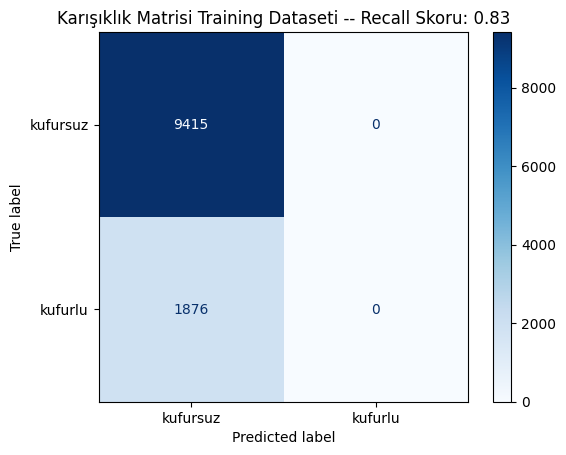

In [ ]:
y_pred_probs_valid = model_1.predict(valid_dataset)
y_pred_valid = tf.argmax(y_pred_probs_valid, axis=1)
displayConfusionMatrix(test_labels, y_pred_valid, "Training")

In [ ]:
NB_START_EPOCHS = 5

In [ ]:
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

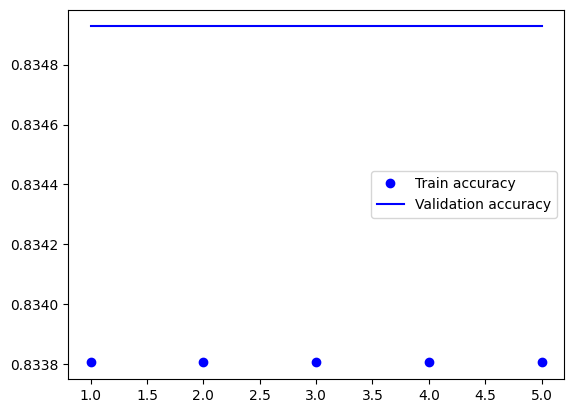

In [ ]:
eval_metric(model_1_history, 'accuracy')

BERT MODEL

In [ ]:
from transformers import AutoTokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/263k [00:00<?, ?B/s]

In [ ]:
X = df_tweet["ptlTweet"].values

In [ ]:
y = df_tweet["SwearExists"].values

In [ ]:
df_tweet["SwearExists"].value_counts()

SwearExists
0    23539
1     4688
Name: count, dtype: int64

In [ ]:
max_token = []
for sent in X:
  for sent2 in sent.split(" "):
    sent2.replace("'","")
    if isinstance(sent2, int):
      continue
    else:
      input_ids = tokenizer.encode(sent2, add_special_tokens=True)
      max_token.append(len(input_ids))


    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

print('Max sentence length: ', max(max_token))

Max sentence length:  12


In [ ]:
def transformation(X):
  # set array dimensions
  seq_len = 160

  # input_ids'ler için Xids boş listesini, attention_mask'ler için Xmask boş listesini oluşturuyoruz.
  Xids = []
  Xmask = []


  for sentence in X: # corpustan tüm yorumları sırayla çekiyoruz.

      tokens = tokenizer.encode_plus(sentence, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True)
      # çektiğimiz herbir yorumu(sentence) vektörlere dönüştürüyoruz.

      # assign tokenized outputs to respective rows in numpy arrays
      Xids.append(tokens['input_ids']) # her bir yoruma karşılık gelen input_ids vektörünü Xids listesine append ediyoruz.
      Xmask.append(tokens['attention_mask'])

  return np.array(Xids), np.array(Xmask) # Xids ve Xmask listelerini np.array ile (yorum sayısı, 160) boyutlarında matrixlere dönüştürüyoruz.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [ ]:
X_df = pd.DataFrame(y_train, columns=["swearexists"])
X_df

,swearexists
0,0
1,0
2,0
3,0
4,0
...,...
22576,0
22577,0
22578,0
22579,0


In [ ]:
X_df["swearexists"].value_counts()

swearexists
0    18860
1     3721
Name: count, dtype: int64

In [ ]:
Xids_train, Xmask_train = transformation(X_train)

# Train setimiz için 2 ayrı matriximizi düzenliyoruz.

Xids_test, Xmask_test  = transformation(X_test)
# Test setimiz için de 2 ayrı matriximizi düzenliyoruz.

In [ ]:
labels_train = y_train.reshape(-1,1)
labels_train

# BERT modelleri target'ı da bir matrix olarak ister. Bu sebeple y_train targetımızı (len(y_train), 1) boyutunda bir matrix'e dönüştürüyoruz.

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
labels_test = y_test.reshape(-1,1)
labels_test

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,Xmask_train, labels_train))
dataset_train

<TensorSliceDataset element_spec=(TensorSpec(shape=(160,), dtype=tf.int64, name=None), TensorSpec(shape=(160,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

<TensorSliceDataset element_spec=(TensorSpec(shape=(160,), dtype=tf.int64, name=None), TensorSpec(shape=(160,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

# Yukarıda elde ettiğimiz tensörlerden hangisi 'input_ids' hangisi 'attention_mask' ve hangisi labels model bunları bilemez. Bu sebeple
# bu bilgiyi bizim modele sağlamamız gerekiyor. Bunun için yukarıdaki fonksiyonu tanımlıyoruz.
# süslü parantez içerisine 'input_ids' ve  'attention_mask' tanımlamamızı yapıyoruz. Labels'ı süslü parantez dışarısında bırakıyoruz.

In [ ]:
# map_func metodunu datasete mapliyoruz
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [ ]:
# Take the TensorSliceDataset's and turn them into prefetched batches
train_ds = dataset_train.batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = dataset_test.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras import layers
from transformers import TFAutoModel
from tensorflow.keras import Model

In [ ]:
def create_model():
    # BERTTürk modeli sadece pytorch tensörleri üzerinden eğitildiğinden modelin Tensorflow kütüphanesi ile çalışabilmesi için AutoModel yerine TFAutoModel yazıyoruz.

    model = TFAutoModel.from_pretrained("dbmdz/bert-base-turkish-uncased")
    # Notebookun yeralan huggingface bert türk linkinden model kurma işlemlemleri için gerekli olan kodları aynen alıyoruz.
    # Tokenization işlemleri "dbmdz/bert-base-turkish-uncased" ile yapıldığından eğitimide "dbmdz/bert-base-turkish-uncased" ile yapmamız gerekiyor.
    # "dbmdz/bert-base-turkish-cased" ile eğitim yapılırsa sonuçlarımız kötü çıkacaktır.

    input_ids = tf.keras.layers.Input(shape=(160,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(160,), name='attention_mask', dtype='int32')
    # inputlarımız token embeddings (input_ids) ve position embeddings (attention_mask)'den oluştuğundan herbiri için bir input layer oluşturuyoruz.
    # Her bir gözlem için input layerlarımızın boyutlarını (shape= (160,)) veriyoruz.
    # modelin bu layerları biribirinden ayırt edebilmesi için name olarak map_func fonksiyonu içinde belirlediğimiz isimleri kullanıyoruz. Farklı isimler kullanılırsa model
    # hata döndürür.
    # BERT modelleri dtype= "int32" olarak çalışır. Bu sebeple dtype="int32" olarak belirtiyoruz.

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]
    # embeddings layer, BERT model üzerinde daha önce eğitilip hafızasında tutulan word embeddingleri çektiğimiz katmandır.
    # Çekilen Word embeddingler birleştirilerek sentence embeddinglere dönüştürülür.
    # Elde ettiğimiz sentence embeddinglerin olumlu mu olumsuz mu olduğuna dair eğitimimizi Dense layer üzerinde yapacağız.

    x = tf.keras.layers.Dense(32, activation='relu')(embeddings)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.1)(x) #0.1 oranı developerlar tarafından tavsiye edilen orandır.
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x) # outputumuz döndürüyor.


    # Embeddings layerdan elde ettiğimiz sentence embeddingsleri Dense layer'a göndermek için Dense() layerdan sonra bir tuple açıp içerisine bir önceki layerın ismini yazıyoruz
    # Aynen burda olduğu gibi "Dense(160, activation='relu')(embeddings)". Bu sayede embeddings layerdaki bilgiler Dense layera aktarılmış oldu.


    return Model(inputs=[input_ids, attention_mask], outputs=y)
    # son aşamada elde ettiğimiz input ve outputlar Model fonksiyonu içine tanımlanır.

# modeli bir fonksiyon içinde kurma sebebimiz aşağıdaki strategy.scope() kapsamında yapacağımız işlemlerin daha sade görünmesi için yoksa burdaki tüm kodları strategy.scope()
# altında yazmamız gerekecekti.

Buradaki projede küfürlü tweetleri aşağıdaki dağılımla görmüştük.

swearexists
0    18860
1     3721
Name: count, dtype: int64

Dengesiz dağılımlı bir veri olduğu için başarı metriğini gerçek pozitiflerin başarısına odaklanan Recall olarak belirledim

Çıktı küfürlü veya küfürlü değil olduğu için loss BinaryCrossentropy olarak belirledim.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Recall

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = BinaryCrossentropy()
recall = Recall()
model = create_model()
model.compile(optimizer=optimizer, loss=loss, metrics=[recall])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tf_model.h5:   0%|          | 0.00/545M [00:00<?, ?B/s]

Some layers from the model checkpoint at dbmdz/bert-base-turkish-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at dbmdz/bert-base-turkish-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 160)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 160)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  110617344   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 160,                                           

! Modelin eğitilmesi 7 saat civarı sürmektedir. Model fit'in altında bulunan kayıt edilmiş loaded_model kullanılabilinir

In [ ]:
epochs = 3
model.fit(train_ds, epochs=3, validation_data= val_ds)

Epoch 1/3
706/706 [==============================] - 7831s 11s/step - loss: 0.3732 - recall: 0.7353 - val_loss: 0.1641 - val_recall: 0.7342
Epoch 2/3
706/706 [==============================] - 7667s 11s/step - loss: 0.1655 - recall: 0.8723 - val_loss: 0.0916 - val_recall: 0.9462
Epoch 3/3
706/706 [==============================] - 7517s 11s/step - loss: 0.1121 - recall: 0.9495 - val_loss: 0.1002 - val_recall: 0.9514


In [ ]:
model.save("/content/drive/MyDrive/DDI_ODEVI/ddiModel_onurturkmen_234329043",save_format='tf')

Eğitilmiş model aşağıdaki link üzerinden yüklenebilinir

https://drive.google.com/drive/folders/117yUoE_G-P5PHX9oWKXeAahJUPFJE5xI?usp=sharing

In [ ]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/DDI_ODEVI/ddiModel_onurturkmen_234329043")

In [ ]:
loaded_model.evaluate(val_ds)

177/177 [==============================] - 564s 3s/step - loss: 0.1002 - recall: 0.9514


[0.10022921860218048, 0.9513960480690002]

validation verisi üzerinden tahmin olasılıklarını bulup ikili sınıf için yuvarlama yaparak sonuçları kayıt ederiz

In [ ]:
model_pred_probs = loaded_model.predict(val_ds)
model_pred_probs

array([[0.08554938],
       [0.99999964],
       [0.99999344],
       ...,
       [0.08670759],
       [0.0966506 ],
       [0.08263388]], dtype=float32)

In [ ]:
model_preds = tf.round(model_pred_probs)

Diğer başarı oranlarını da görmek için aşağıdaki fonksiyon yazıldı

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  İkili sınıflandırma modelinin model doğruluğunu, kesinliğini, geri çağırılmasını ve f1 puanını hesaplar.

  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

Başarı oranları iyi olmakla birlikte yeterli veri olmadığı için model overfitting ile karşılaşıyor olabilir.

In [ ]:
model_results = calculate_results(y_true= labels_test,
                                    y_pred=model_preds)
model_results

{'accuracy': 99.06128232376903,
 'precision': 0.9906380807588672,
 'recall': 0.9906128232376904,
 'f1': 0.9905316402269687}

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
class_names = np.array(["kufursuz","kufurlu"])

In [ ]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        display_labels=class_names,
        cmap=plt.cm.Blues
    )

    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")

    disp.ax_.set_title("Karışıklık Matrisi " + dataset + " Dataseti -- Recall Skoru: " + str(model_recall.round(2)))

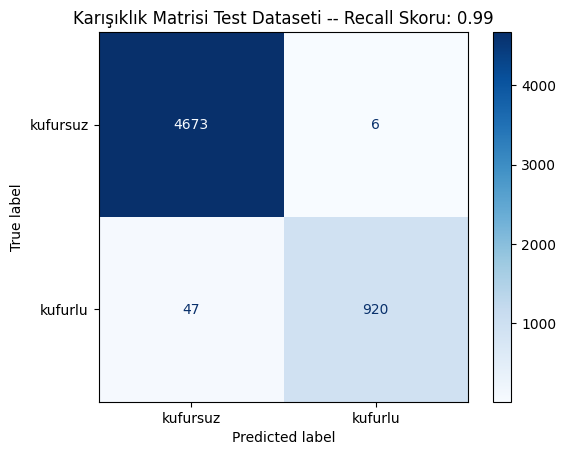

In [ ]:
displayConfusionMatrix(labels_test, model_preds, "Test")

Confusion matrix TN yüksek çıkması zaten küfürsüz tweetler fazla olduğu içindir. Küfürsüz tweetlerin çok azı küfürlü (FP) olarak algılanmıştır. TP lere baktığımda başarının daha da yüksek olduğunu görmekteyim.

***
Aşağıda modelin testinde hiç kullanılmamış veri setini indiriyoruz

In [ ]:
dataset2 = load_dataset("anilguven/turkish_tweet_emotion_dataset")
dataset2

Generating train split:   0%|          | 0/4000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 4000
    })
})

In [ ]:
df_tweet = pd.DataFrame(dataset2["train"])
df_tweet.head()

,text
0,allahım çıldıracağım yemin ederim çıldıracağım...
1,site çalıştıda ürün stokları bitti diyor mal m...
2,"sebebi neydi bağıracağım kaldı ,kizgin"
3,black friday amk çıkardınız bokuda mal mısınız...
4,kısa kısa cevaplar vericeksen yazıyorsun geriz...


In [ ]:
df_tweet["text"][0]

'allahım çıldıracağım yemin ederim çıldıracağım sinirimden yerden çıkaramıyorum cam çerçeve indireceğim varsa ,kizgin'

Veriyi incelediğimizde verisetinin etiketinin virgüllü olarak geldiğini görmekteyiz. Düzenlem için veri setini tweet target olarak ayrı düzenliyoruz

In [ ]:
dataset3_tweet = pd.DataFrame(columns=["tweet","target"])
dataset3_tweet

,tweet,target


In [ ]:
dataset3_tweet[["tweet","target"]] =  df_tweet["text"].str.split(',',expand=True)
dataset3_tweet.head()

,tweet,target
0,allahım çıldıracağım yemin ederim çıldıracağım...,kizgin
1,site çalıştıda ürün stokları bitti diyor mal m...,kizgin
2,sebebi neydi bağıracağım kaldı,kizgin
3,black friday amk çıkardınız bokuda mal mısınız...,kizgin
4,kısa kısa cevaplar vericeksen yazıyorsun geriz...,kizgin


In [ ]:
from zemberek import (
    TurkishSpellChecker,
    TurkishSentenceNormalizer,
    TurkishSentenceExtractor,
    TurkishMorphology,
    TurkishTokenizer
)

In [ ]:
morphology = TurkishMorphology.create_with_defaults()

INFO:zemberek.morphology.turkish_morphology:TurkishMorphology instance initialized in 10.507125854492188


2024-05-07 16:48:41,496 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 10.507125854492188



veri setini modelimizdeki girdiye uygun olarak morfolojik çıktılarımıza göre düzenliyoruz

In [ ]:
lemSen = []
for index , row in dataset3_tweet.iterrows():
  words = row["tweet"]
  newSentence = []
  for word in words.split(" "):
    if word == '':
      continue
    else:
      results = morphology.analyze(word)
      if len(results.analysis_results) == 0:
        continue

      newSentence.append(results.analysis_results[0].format_string().split(" ")[0])
  lemSen.append( newSentence)

In [ ]:
dataset3_tweet["tagged_tweet"] = lemSen

In [ ]:
dataset3_tweet["tagged_tweet"] = dataset3_tweet["tagged_tweet"].apply(clean_brackets)

Veri setimizi bert modelindeki metin haritalamasına uygun şekilde düzenliyoruz

In [ ]:
def prep_data(text):
  import tensorflow as tf

  # 1. Predict edeceğimiz yeni gözlemleri öncelikle token embeddings (input_ids) ve position embeddings (attention_mask) matrixlerine dönüştürüyoruz.
  #    Bu fonksiyonu kullanabilmek için öncelikle transformation funksiyonunu çalıştırmanız gerektiğini unutmayın.
  Xids_obs, Xmask_obs = transformation(text)

  # 2. Xids_obs, Xmask_obs matrixlerimizi tenserflow tensörlerine dönüştürüyoruz.
  dataset_obs = tf.data.Dataset.from_tensor_slices((Xids_obs, Xmask_obs))

  # 3. Dönüştürdüğümüz tensorflow tensörlerini modelin tanıyabilmesi için "input_ids" ve "attention_mask" olarak isimlendiriyoruz.
  def map_func(Tensor_Xids, Tensor_Xmask):
       return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}

  dataset_obs = dataset_obs.map(map_func)

  # 4. Son aşama olarak tensorflow tensörlerimizi train datasında olduğu gibi 32'li paketler haline getiriyoruz. Yoksa shape uyumsuzluk hatası alırız.
  batch_size = 32 # eğitim datasına uygulanan batch_size'ı uyguluyoruz.
  obs_ds = dataset_obs.batch(batch_size)

  return obs_ds

In [ ]:
prep_test = prep_data(dataset3_tweet["tagged_tweet"].to_list())

In [ ]:
model_pred_probs_test = loaded_model.predict(prep_test)

In [ ]:
model_test_preds = tf.round(model_pred_probs_test)

In [ ]:
test_preds = tf.cast(model_test_preds, dtype= tf.int32)

In [ ]:
class_names[0]

'kufursuz'

In [ ]:
test_pred_classes = [class_names[pred] for pred in test_preds]

In [ ]:
dataset3_tweet.head(5)

,tweet,target,tagged_tweet
0,allahım çıldıracağım yemin ederim çıldıracağım...,kizgin,'allah:noun' 'çıldırmak:verb' 'yem:noun' 'etme...
1,site çalıştıda ürün stokları bitti diyor mal m...,kizgin,'sit:noun' 'ürün:noun' 'stok:noun' 'bitmek:ver...
2,sebebi neydi bağıracağım kaldı,kizgin,'sebep:noun' 'ne:adj' 'bağırmak:verb' 'kalmak:...
3,black friday amk çıkardınız bokuda mal mısınız...,kizgin,'black:noun' 'friday:noun' 'çıkarmak:verb' 'ma...
4,kısa kısa cevaplar vericeksen yazıyorsun geriz...,kizgin,'kısa:adj' 'kısa:adj' 'cevaplamak:verb' 'yazma...


In [ ]:
dataset3_tweet["label"] = test_pred_classes
dataset3_tweet.head()

,tweet,target,tagged_tweet,label
0,allahım çıldıracağım yemin ederim çıldıracağım...,kizgin,'allah:noun' 'çıldırmak:verb' 'yem:noun' 'etme...,[kufurlu]
1,site çalıştıda ürün stokları bitti diyor mal m...,kizgin,'sit:noun' 'ürün:noun' 'stok:noun' 'bitmek:ver...,[kufurlu]
2,sebebi neydi bağıracağım kaldı,kizgin,'sebep:noun' 'ne:adj' 'bağırmak:verb' 'kalmak:...,[kufursuz]
3,black friday amk çıkardınız bokuda mal mısınız...,kizgin,'black:noun' 'friday:noun' 'çıkarmak:verb' 'ma...,[kufurlu]
4,kısa kısa cevaplar vericeksen yazıyorsun geriz...,kizgin,'kısa:adj' 'kısa:adj' 'cevaplamak:verb' 'yazma...,[kufurlu]


In [ ]:
final_dataset = dataset3_tweet[["tweet","label" ]].copy()
final_dataset.head()

,tweet,label
0,allahım çıldıracağım yemin ederim çıldıracağım...,[kufurlu]
1,site çalıştıda ürün stokları bitti diyor mal m...,[kufurlu]
2,sebebi neydi bağıracağım kaldı,[kufursuz]
3,black friday amk çıkardınız bokuda mal mısınız...,[kufurlu]
4,kısa kısa cevaplar vericeksen yazıyorsun geriz...,[kufurlu]


In [ ]:
final_dataset["label"] = final_dataset["label"].apply(clean_brackets)
final_dataset.head()

,tweet,label
0,allahım çıldıracağım yemin ederim çıldıracağım...,'kufurlu'
1,site çalıştıda ürün stokları bitti diyor mal m...,'kufurlu'
2,sebebi neydi bağıracağım kaldı,'kufursuz'
3,black friday amk çıkardınız bokuda mal mısınız...,'kufurlu'
4,kısa kısa cevaplar vericeksen yazıyorsun geriz...,'kufurlu'
